In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
import pandas as pd
from datetime import datetime

In [22]:
def get_data(limit=None):
    df = pd.read_csv('train.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

In [23]:
class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X):
            sl = SortedList() 
            for j,xt in enumerate(self.X): 
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            
            votes = {}
            for _, v in sl:
                votes[v] = votes.get(v,0) + 1
            
            max_votes = 0
            max_votes_class = -1
            for v,count in votes.items():
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

Reading in and transforming data...

k = 1
Training time: 0:00:00.000027
Train accuracy: 1.0
Time to compute train accuracy: 0:00:10.018677 Train size: 1000
Test accuracy: 0.9
Time to compute test accuracy: 0:00:14.742845 Test size: 1000

k = 2
Training time: 0:00:00.000021
Train accuracy: 1.0
Time to compute train accuracy: 0:00:09.834220 Train size: 1000
Test accuracy: 0.9
Time to compute test accuracy: 0:00:13.846527 Test size: 1000

k = 3
Training time: 0:00:00.000004
Train accuracy: 0.951
Time to compute train accuracy: 0:00:09.803448 Train size: 1000
Test accuracy: 0.905
Time to compute test accuracy: 0:00:13.919843 Test size: 1000

k = 4
Training time: 0:00:00.000004
Train accuracy: 0.957
Time to compute train accuracy: 0:00:09.980356 Train size: 1000
Test accuracy: 0.905
Time to compute test accuracy: 0:00:14.500040 Test size: 1000

k = 5
Training time: 0:00:00.000013
Train accuracy: 0.938
Time to compute train accuracy: 0:00:10.381053 Train size: 1000
Test accuracy: 0.897
Time

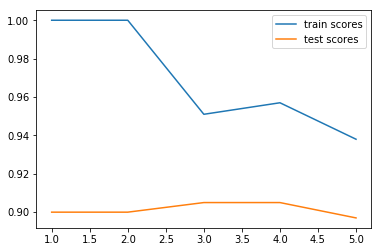

In [24]:
if __name__ == '__main__':
    X, Y = get_data(2000)
    Ntrain = 1000
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    train_scores = []
    test_scores = []
    ks = (1,2,3,4,5)
    for k in ks:
        print("\nk =", k)
        knn = KNN(k)
        t0 = datetime.now()
        knn.fit(Xtrain, Ytrain)
        print("Training time:", (datetime.now() - t0))

        t0 = datetime.now()
        train_score = knn.score(Xtrain, Ytrain)
        train_scores.append(train_score)
        print("Train accuracy:", train_score)
        print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

        t0 = datetime.now()
        test_score = knn.score(Xtest, Ytest)
        print("Test accuracy:", test_score)
        test_scores.append(test_score)
        print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    plt.plot(ks, train_scores, label='train scores')
    plt.plot(ks, test_scores, label='test scores')
    plt.legend()
    plt.show()